## **Download required libraries**

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install whatthelang
!pip install git+https://github.com/andrianllmm/tagalog-stemmer.git@main

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.9/786.9 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.7/244.7 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached cysignals-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Created wheel for whatthelang: filename=whatthelang-1.0.1-py3-none-any.whl size=789800 sha256=fdcd576805ccf7946ab58ea49f3b8db3680326687eb31ecfd1227e13091403b0
  Stored in directory: /root/.cache/pip/wheels/e0/f7/2e/238a9063d3acf4bbbf069443e79285ce65fc1ffb1e81380114
  Created wheel for pyfasttext: filename=pyfasttext-0.4.6-cp310-cp310-linux_x86_64.whl size=2033633 sha256=845994043b178bee49c6f79093de175c04d3cd836fc2a978356a83ef238e37fb
  Stored in directory: /root/.cache/pip/wheels/a1/1e/10/0df99679118ea1dfa664f0b4fd2b906344f885e278563ae341
Successfully built whatthelang

## **Download stopwords from nltk**

## **Import required libraries**

In [ ]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
nltk.download("wordnet")

# vis
import pyLDAvis
import pyLDAvis.gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Data preprocessing**

In [ ]:
import re
from whatthelang import WhatTheLang

wtl = WhatTheLang()

# Function to classify content as 'English' or 'Taglish'
def classify_language(text):
    predicted_lang = wtl.predict_lang(text)
    if predicted_lang == 'en':
        return 'English'
    elif predicted_lang == 'tl':
        return 'Taglish'
    else:
        return 'Taglish'  # Default to Taglish

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Load the dataset
df = pd.read_csv("AI in edu dataset - Sheet1.csv")

# Remove null values
df = df.dropna(subset=['Content'])

# Remove all columns except content
df = df.drop(columns=['Platform', 'Sentiment'])

# Remove newlines from content
df = df.map(lambda x: re.sub(r'\n', '', x))

# Remove punctuation
df = df.map(lambda x: re.sub('[,\.!?]', '', x))

# Convert to lowercase
df = df.map(lambda x: x.lower())

# Remove emojis
df = df.map(lambda x: remove_emojis(x))

# Apply the classification to the 'Content' column
df['Predicted_Language'] = df['Content'].map(classify_language)

english_df = df[df['Predicted_Language'] == 'English']
taglish_df = df[df['Predicted_Language'] == 'Taglish']

# Count the number of English and Taglish texts
language_counts = df['Predicted_Language'].value_counts()

# Print the number of English and Taglish texts
print("Language Count:")
print(language_counts)

# Remove all columns except content since it is not needed anymore
english_df = english_df.drop(columns='Predicted_Language')
taglish_df = taglish_df.drop(columns='Predicted_Language')

# Display the first few rows of the preprocessed data
print(english_df.head())
print(taglish_df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:46: DeprecationWarning: invalid escape sequence '\.'
<>:46: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-43-f8a65bec8e79>:46: DeprecationWarning: invalid escape sequence '\.'
  df = df.map(lambda x: re.sub('[,\.!?]', '', x))


Language Count:
Predicted_Language
English    324
Taglish    188
Name: count, dtype: int64
                                             Content
0  the education system that ai will destroy will...
1  ai tool sare very helpful but you need to use ...
2  ai and teachers should join forces in a collab...
3  kids that learn how to use the ai will realize...
4  but here’s the thing if we embrace the ai how ...
                                               Content
236  ok sya nagbibigay ng idea at pang research mas...
237  kung aasa kayo sa ai to do school work kayo di...
239  nakakadismaya panahon ngayon mga kabataan ngay...
240  para sa akin i like ai to be a mainstream thin...
242  sobrang dali ng matuto ng students ngayon kami...


## **Data Exploration**

### **Using a Wordcloud to get the most common words in the data**


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


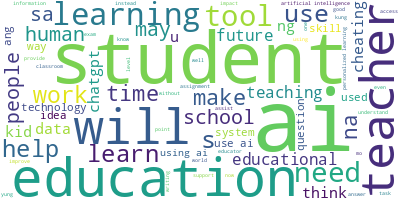

In [ ]:
# ENGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(english_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


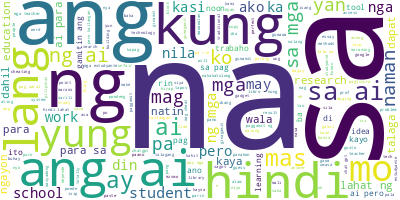

In [ ]:
# TAGLISH WORDCLOUD
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(taglish_df['Content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud for English
wordcloud.to_image()

## **Data Preparation for LDA**

## **Lemmatization and removal of stopwords**

In [ ]:
from tglstemmer import stemmer

lemmatizer = WordNetLemmatizer()

english_stop_words = set(stopwords.words('english'))
tagalog_stop_words = set()
with open('tagalog_stop_words.txt', 'r') as file:
  for line in file:
    tagalog_stop_words.add(line.strip())

# Combine English and Tagalog stop words into one set
combined_stop_words = english_stop_words.union(tagalog_stop_words)

# Function to process each document (tokenization, stopword removal, lemmatization, stemming)
def preprocess_doc(document):
    tokens = gensim.utils.simple_preprocess(str(document), deacc=True)  # Tokenization
    tokens = [token for token in tokens if token not in combined_stop_words]  # Stopword removal
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in combined_stop_words and token not in ['english', 'taglish']]
    stemmed_tokens = [stemmer.get_stem(token) for token in tokens]  # Use stemmer for stemming
    return stemmed_tokens

# Convert the DataFrame content into a list of documents
data = df.values.tolist()

processed_data = [preprocess_doc(doc) for doc in data]

# Display the first 5 processed documents
for doc in processed_data[:5]:
    print(doc)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['education', 'system', 'ai', 'destroy', 'system', 'adapt', 'change', 'world', 'ai']
['ai', 'tool', 'sare', 'helpful', 'need', 'use', 'properly', 'going', 'replace', 'hom', 'still', 'need', 'hom', 'touch']
['ai', 'teacher', 'join', 'force', 'collaborative', 'effort', 'revolutionize', 'education', 'ai', 'teacher', 'empower', 'student', 'best']
['kid', 'learn', 'use', 'ai', 'realize', 'career', 'obsolete', 'ai', 'take', 'smarter', 'path']
['thing', 'embrace', 'ai', 'student', 'ever', 'learn', 'form', 'opinion', 'ask', 'ai', 'form']


## **Dictionary and corpus creation**

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(processed_data)

# Create Corpus
corpus = [id2word.doc2bow(text) for text in processed_data]

# Display Results
print(corpus[:1][0][:15])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **LDA Model Training**

### **Single-core training**


In [ ]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=3, id2word=id2word, passes=10, alpha='auto', eta='auto')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Display Topics**

In [ ]:
num_topics = lda_model.num_topics

# Print each topic with its top words in column format
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=10)  # Get top 10 words for each topic
    words = [f"{word}" for word, weight in topic_terms]
    weights = [f"({round(weight, 4)})" for word, weight in topic_terms]

    print(f"Topic #{topic_id}:")

    # Print each word and its weight in two columns
    for word, weight in zip(words, weights):
        print(f"{word:<15} {weight:<10}")  # Adjust <15 and <10 for column width if needed

    print()

Topic #0:
ai              (0.03220000118017197)
student         (0.03009999915957451)
learning        (0.022299999371170998)
teacher         (0.012199999764561653)
education       (0.009399999864399433)
help            (0.007799999788403511)
need            (0.007199999876320362)
tool            (0.006599999964237213)
time            (0.005499999970197678)
use             (0.005499999970197678)

Topic #1:
ai              (0.042100001126527786)
education       (0.011500000022351742)
work            (0.008799999952316284)
gamit           (0.00839999970048666)
man             (0.006800000090152025)
idea            (0.006599999964237213)
research        (0.006200000178068876)
student         (0.00570000009611249)
learning        (0.00570000009611249)
system          (0.004900000058114529)

Topic #2:
ai              (0.06030000001192093)
student         (0.0203000009059906)
education       (0.010999999940395355)
teacher         (0.010400000028312206)
gamit           (0.00989999994635582)
to

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.002819 -0.078687       1        1  54.166801
0     -0.091277  0.037492       2        1  27.298611
1      0.088458  0.041195       3        1  18.534588, topic_info=          Term        Freq       Total Category  logprob  loglift
127   learning   81.000000   81.000000  Default  30.0000  30.0000
25     student  177.000000  177.000000  Default  29.0000  29.0000
1582     gamit   61.000000   61.000000  Default  28.0000  28.0000
1           ai  431.000000  431.000000  Default  27.0000  27.0000
26     teacher   79.000000   79.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
28         kid    4.673313   17.612898   Topic3  -5.8495   0.3588
1785     natin    4.456419   13.937013   Topic3  -5.8970   0.5453
17         use    5.175657   48.442827   Topic3  -5.7474  -0.5509
93        make    4.848192   31.608884   Topic3  -5.8128  -0.1893
15        tool    4.928508   57.498270   Topic3  -5.7964  -0.7712

[231 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
408       1  0.956069  accurate
197       1  1.003767  activity
290       2  0.666734  adaptive
1918      3  0.966092       add
1         1  0.663466        ai
...     ...       ...       ...
51        2  0.112544      work
51        3  0.315123      work
72        1  0.932001     write
113       1  0.925175   writing
113       2  0.092517   writing

[322 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

## **Coherence Score**

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.40582936164298605
